## Cars prices Poland

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functions.LoadingData import LoadData
from IPython.display import display
%matplotlib inline

### Loading and exploring the data

Shape of DataFrame is (117927, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       117927 non-null  int64 
 1   mark             117927 non-null  object
 2   model            117927 non-null  object
 3   generation_name  87842 non-null   object
 4   year             117927 non-null  int64 
 5   mileage          117927 non-null  int64 
 6   vol_engine       117927 non-null  int64 
 7   fuel             117927 non-null  object
 8   city             117927 non-null  object
 9   province         117927 non-null  object
 10  price            117927 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 9.9+ MB


None


Head of DataFrame:


,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900



Dataset statistics:


,Unnamed: 0,year,mileage,vol_engine,price
count,117927.000000,117927.000000,1.179270e+05,117927.000000,1.179270e+05
mean,58963.000000,2012.925259,1.409768e+05,1812.057782,7.029988e+04
std,34042.736935,5.690135,9.236936e+04,643.613438,8.482458e+04
min,0.000000,1945.000000,0.000000e+00,0.000000,5.000000e+02
25%,29481.500000,2009.000000,6.700000e+04,1461.000000,2.100000e+04
50%,58963.000000,2013.000000,1.462690e+05,1796.000000,4.190000e+04
75%,88444.500000,2018.000000,2.030000e+05,1995.000000,8.360000e+04
max,117926.000000,2022.000000,2.800000e+06,7600.000000,2.399900e+06



Number of NaN values in DataFrame:


Unnamed: 0             0
mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64


Number of duplicates in DataFrame:


0


Visualisation of missing values in data set:


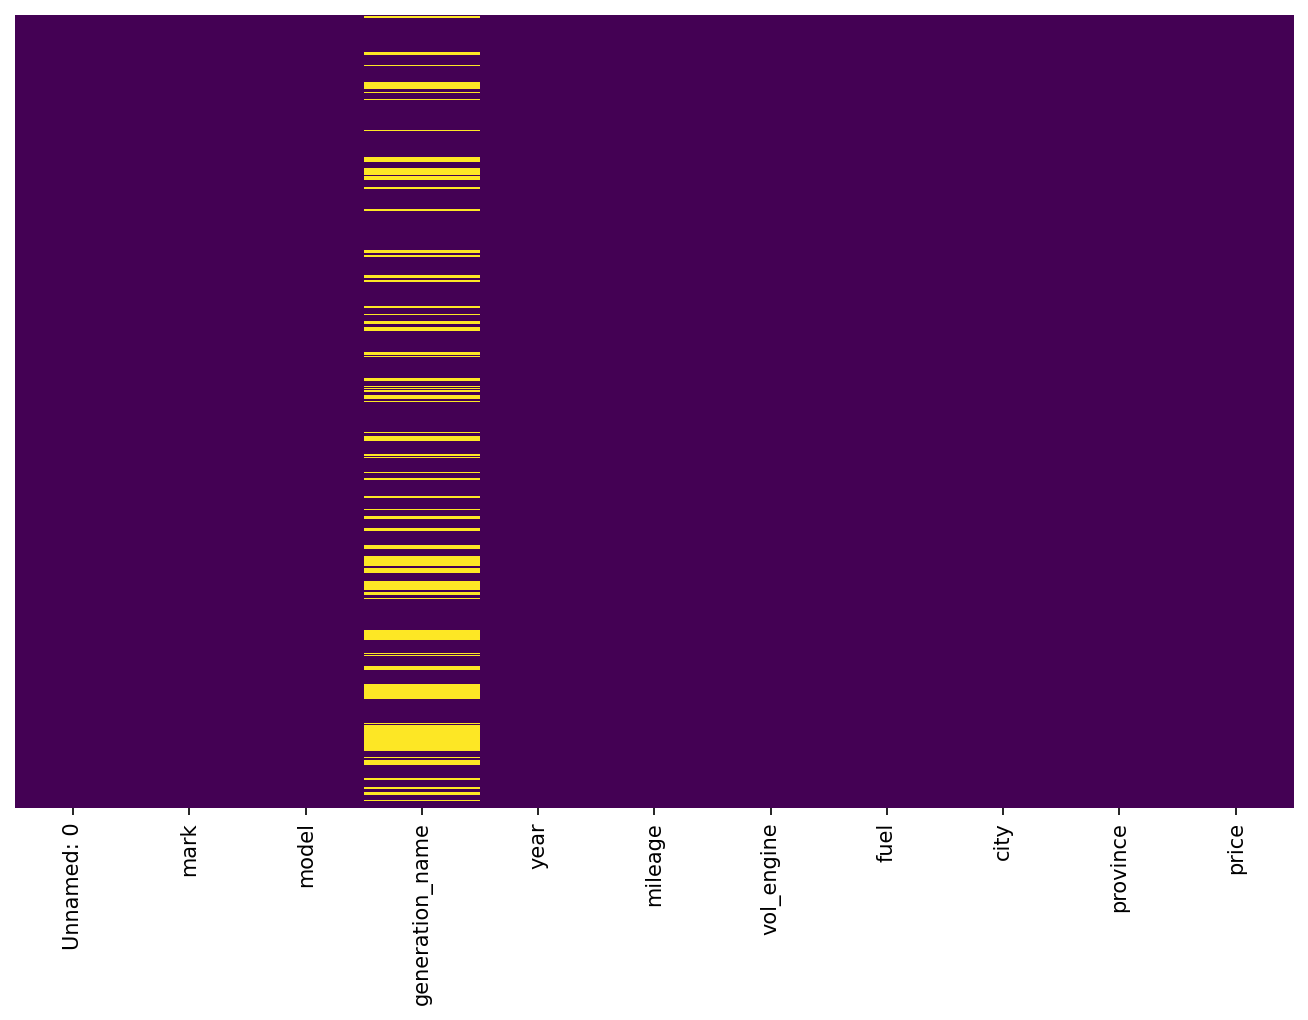

In [2]:
d = LoadData('data/Car_Prices_Poland_Kaggle.csv')
cars = d.create_data()

In [3]:
cars.columns

Index(['Unnamed: 0', 'mark', 'model', 'generation_name', 'year', 'mileage',
       'vol_engine', 'fuel', 'city', 'province', 'price'],
      dtype='object')

In [4]:
cars.drop('Unnamed: 0',axis=1, inplace=True)

In [5]:
cars.head()

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [6]:
cars['mark'].unique()

array(['opel', 'audi', 'bmw', 'volkswagen', 'ford', 'mercedes-benz',
       'renault', 'toyota', 'skoda', 'alfa-romeo', 'chevrolet', 'citroen',
       'fiat', 'honda', 'hyundai', 'kia', 'mazda', 'mini', 'mitsubishi',
       'nissan', 'peugeot', 'seat', 'volvo'], dtype=object)

In [7]:
cars['fuel'].unique()

array(['Diesel', 'CNG', 'Gasoline', 'LPG', 'Hybrid', 'Electric'],
      dtype=object)

<AxesSubplot:xlabel='fuel', ylabel='count'>

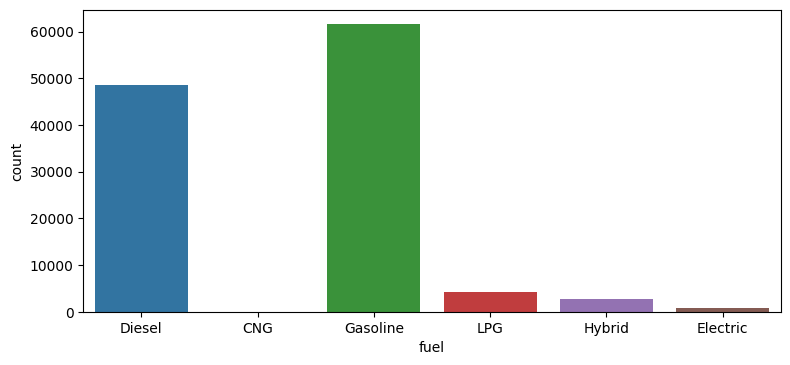

In [8]:
plt.figure(figsize=(9,4),dpi=100)
sns.countplot(data=cars, x='fuel')

[Text(0.5, 1.0, 'Amount of Cars Produced Each Year')]

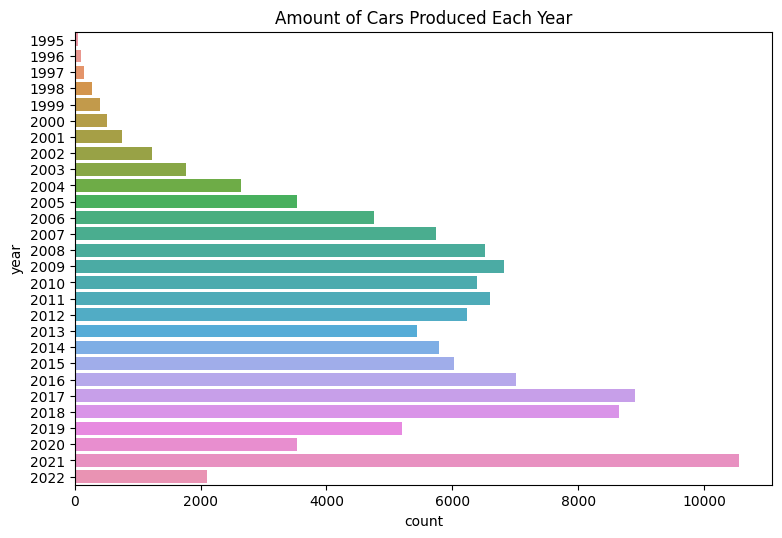

In [9]:
plt.figure(figsize=(9,6),dpi=100)
count_year = sns.countplot(y=cars['year'].loc[cars['year'] > 1994])
count_year.set(title='Amount of Cars Produced Each Year')
# We are using cars produced after 1994, because amount of cars produced before 1994 compared to other years reduces
# transparency of the plot

### Looking for Peugeot 2008 prices, because that's my parent's car that they want to sell currently

In [10]:
peugeot_2008 = cars.loc[(cars['mark'] == 'peugeot')&(cars['model']=='2008')].copy(deep=True)
peugeot_2008.head()

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
109031,peugeot,2008,NaN,2020,2500,0,Electric,Gdańsk,Pomorskie,145900
109032,peugeot,2008,NaN,2016,185000,1199,Gasoline,Ostrów Mazowiecka,Mazowieckie,29900
109033,peugeot,2008,NaN,2019,26125,1499,Diesel,Jankowo Dolne,Wielkopolskie,37900
109034,peugeot,2008,NaN,2017,61206,1199,Gasoline,Lublin,Lubelskie,62000
109035,peugeot,2008,NaN,2013,100000,1199,Gasoline,Biała Podlaska,Lubelskie,39900


In [11]:
peugeot_2008.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448 entries, 109031 to 109478
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   mark             448 non-null    object
 1   model            448 non-null    object
 2   generation_name  0 non-null      object
 3   year             448 non-null    int64 
 4   mileage          448 non-null    int64 
 5   vol_engine       448 non-null    int64 
 6   fuel             448 non-null    object
 7   city             448 non-null    object
 8   province         448 non-null    object
 9   price            448 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 38.5+ KB


In [12]:
peugeot_2008.drop(columns=['generation_name', 'mark','model'], inplace=True, axis=1)
peugeot_2008.head()

,year,mileage,vol_engine,fuel,city,province,price
109031,2020,2500,0,Electric,Gdańsk,Pomorskie,145900
109032,2016,185000,1199,Gasoline,Ostrów Mazowiecka,Mazowieckie,29900
109033,2019,26125,1499,Diesel,Jankowo Dolne,Wielkopolskie,37900
109034,2017,61206,1199,Gasoline,Lublin,Lubelskie,62000
109035,2013,100000,1199,Gasoline,Biała Podlaska,Lubelskie,39900


### One Hot Encoding Province
Using one hot encoding we transform province fearure into numeric vector that we can use in our machine learning algorithm

In [13]:
provinces = peugeot_2008['province'].unique()
provinces

array(['Pomorskie', 'Mazowieckie', 'Wielkopolskie', 'Lubelskie',
       'Łódzkie', 'Śląskie', 'Dolnośląskie', 'Kujawsko-pomorskie',
       'Lubuskie', 'Podkarpackie', 'Małopolskie', 'Podlaskie',
       'Zachodniopomorskie', 'Opolskie', 'Warmińsko-mazurskie',
       'Świętokrzyskie'], dtype=object)

In [14]:
dummies = pd.get_dummies(peugeot_2008['province'],drop_first=False)
dummies.head()

,Dolnośląskie,Kujawsko-pomorskie,Lubelskie,Lubuskie,Mazowieckie,Małopolskie,Opolskie,Podkarpackie,Podlaskie,Pomorskie,Warmińsko-mazurskie,Wielkopolskie,Zachodniopomorskie,Łódzkie,Śląskie,Świętokrzyskie
109031,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
109032,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
109033,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
109034,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
109035,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
peugeot_2008.drop(columns='province', axis=1, inplace=True)

In [16]:
peugeot_2008.head()

,year,mileage,vol_engine,fuel,city,price
109031,2020,2500,0,Electric,Gdańsk,145900
109032,2016,185000,1199,Gasoline,Ostrów Mazowiecka,29900
109033,2019,26125,1499,Diesel,Jankowo Dolne,37900
109034,2017,61206,1199,Gasoline,Lublin,62000
109035,2013,100000,1199,Gasoline,Biała Podlaska,39900


In [17]:
peugeot_2008 = peugeot_2008.join(dummies)
peugeot_2008.head()

,year,mileage,vol_engine,fuel,city,price,Dolnośląskie,Kujawsko-pomorskie,Lubelskie,Lubuskie,...,Opolskie,Podkarpackie,Podlaskie,Pomorskie,Warmińsko-mazurskie,Wielkopolskie,Zachodniopomorskie,Łódzkie,Śląskie,Świętokrzyskie
109031,2020,2500,0,Electric,Gdańsk,145900,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
109032,2016,185000,1199,Gasoline,Ostrów Mazowiecka,29900,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109033,2019,26125,1499,Diesel,Jankowo Dolne,37900,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
109034,2017,61206,1199,Gasoline,Lublin,62000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
109035,2013,100000,1199,Gasoline,Biała Podlaska,39900,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
peugeot_2008.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448 entries, 109031 to 109478
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 448 non-null    int64 
 1   mileage              448 non-null    int64 
 2   vol_engine           448 non-null    int64 
 3   fuel                 448 non-null    object
 4   city                 448 non-null    object
 5   price                448 non-null    int64 
 6   Dolnośląskie         448 non-null    uint8 
 7   Kujawsko-pomorskie   448 non-null    uint8 
 8   Lubelskie            448 non-null    uint8 
 9   Lubuskie             448 non-null    uint8 
 10  Mazowieckie          448 non-null    uint8 
 11  Małopolskie          448 non-null    uint8 
 12  Opolskie             448 non-null    uint8 
 13  Podkarpackie         448 non-null    uint8 
 14  Podlaskie            448 non-null    uint8 
 15  Pomorskie            448 non-null    uint8 
 16  

In [19]:
peugeot_2008['city'].nunique()

168

As we can see number of unique cities in dataset is 168 it means we will delete this feature because it's not going to provide our model to perform better based on weights of this feature

In [20]:
peugeot_2008.drop(axis=1, columns='city', inplace=True)

In [21]:
peugeot_2008.head()

,year,mileage,vol_engine,fuel,price,Dolnośląskie,Kujawsko-pomorskie,Lubelskie,Lubuskie,Mazowieckie,...,Opolskie,Podkarpackie,Podlaskie,Pomorskie,Warmińsko-mazurskie,Wielkopolskie,Zachodniopomorskie,Łódzkie,Śląskie,Świętokrzyskie
109031,2020,2500,0,Electric,145900,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
109032,2016,185000,1199,Gasoline,29900,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
109033,2019,26125,1499,Diesel,37900,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
109034,2017,61206,1199,Gasoline,62000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
109035,2013,100000,1199,Gasoline,39900,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
engine_dummies = pd.get_dummies(peugeot_2008['fuel'])
engine_dummies.head()

,Diesel,Electric,Gasoline,LPG
109031,0,1,0,0
109032,0,0,1,0
109033,1,0,0,0
109034,0,0,1,0
109035,0,0,1,0


In [23]:
peugeot_2008 = peugeot_2008.join(engine_dummies)
peugeot_2008.drop(inplace=True, axis=1, columns='fuel')

In [24]:
peugeot_2008.head()

,year,mileage,vol_engine,price,Dolnośląskie,Kujawsko-pomorskie,Lubelskie,Lubuskie,Mazowieckie,Małopolskie,...,Warmińsko-mazurskie,Wielkopolskie,Zachodniopomorskie,Łódzkie,Śląskie,Świętokrzyskie,Diesel,Electric,Gasoline,LPG
109031,2020,2500,0,145900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
109032,2016,185000,1199,29900,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
109033,2019,26125,1499,37900,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
109034,2017,61206,1199,62000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
109035,2013,100000,1199,39900,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
y = peugeot_2008['price']
peugeot_2008.drop('price', inplace=True, axis=1)
X = peugeot_2008

In [26]:
display(X.head(),y.head())

,year,mileage,vol_engine,Dolnośląskie,Kujawsko-pomorskie,Lubelskie,Lubuskie,Mazowieckie,Małopolskie,Opolskie,...,Warmińsko-mazurskie,Wielkopolskie,Zachodniopomorskie,Łódzkie,Śląskie,Świętokrzyskie,Diesel,Electric,Gasoline,LPG
109031,2020,2500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
109032,2016,185000,1199,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
109033,2019,26125,1499,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
109034,2017,61206,1199,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
109035,2013,100000,1199,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


109031    145900
109032     29900
109033     37900
109034     62000
109035     39900
Name: price, dtype: int64

### Predicting my parents car price

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
linear = make_pipeline(StandardScaler(), LinearRegression())

In [30]:
linear.fit(X_train.values, y_train.values)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [31]:
linear.score(X_train.values, y_train.values)

0.8672670350152505

In [32]:
prediction = linear.predict(X_test.values)
print(f"Model's score on test set is: {linear.score(X_test.values, y_test.values):.2f}")

Model's score on test set is: 0.87


In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
np.sqrt(mean_squared_error(y_test, prediction))

12255.463561202698

In [35]:
print(y_test.iloc[0],X_test.iloc[0], y_test.shape, X_train.columns, X_test.iloc[0].values)

126800 year                   2021
mileage                   1
vol_engine             1199
Dolnośląskie              0
Kujawsko-pomorskie        0
Lubelskie                 0
Lubuskie                  0
Mazowieckie               1
Małopolskie               0
Opolskie                  0
Podkarpackie              0
Podlaskie                 0
Pomorskie                 0
Warmińsko-mazurskie       0
Wielkopolskie             0
Zachodniopomorskie        0
Łódzkie                   0
Śląskie                   0
Świętokrzyskie            0
Diesel                    0
Electric                  0
Gasoline                  1
LPG                       0
Name: 109316, dtype: int64 (135,) Index(['year', 'mileage', 'vol_engine', 'Dolnośląskie', 'Kujawsko-pomorskie',
       'Lubelskie', 'Lubuskie', 'Mazowieckie', 'Małopolskie', 'Opolskie',
       'Podkarpackie', 'Podlaskie', 'Pomorskie', 'Warmińsko-mazurskie',
       'Wielkopolskie', 'Zachodniopomorskie', 'Łódzkie', 'Śląskie',
       'Świętokrzyskie'

#### Creating my parents car example

In [36]:
my_car = pd.Series(index=['year', 'mileage', 'vol_engine', 'Dolnośląskie', 'Kujawsko-pomorskie',
       'Lubelskie', 'Lubuskie', 'Mazowieckie', 'Małopolskie', 'Opolskie',
       'Podkarpackie', 'Podlaskie', 'Pomorskie', 'Warmińsko-mazurskie',
       'Wielkopolskie', 'Zachodniopomorskie', 'Łódzkie', 'Śląskie',
       'Świętokrzyskie', 'Diesel', 'Electric', 'Gasoline', 'LPG'],
                  data=[2014, 74123, 1599, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [37]:
my_car

year                    2014
mileage                74123
vol_engine              1599
Dolnośląskie               0
Kujawsko-pomorskie         0
Lubelskie                  0
Lubuskie                   0
Mazowieckie                0
Małopolskie                1
Opolskie                   0
Podkarpackie               0
Podlaskie                  0
Pomorskie                  0
Warmińsko-mazurskie        0
Wielkopolskie              0
Zachodniopomorskie         0
Łódzkie                    0
Śląskie                    0
Świętokrzyskie             0
Diesel                     0
Electric                   0
Gasoline                   1
LPG                        0
dtype: int64

In [38]:
print(f"My parents can sell their car approximately for {int(linear.predict([my_car]))}zł ")

My parents can sell their car approximately for 41757zł 


### Polynomial Regression

In [39]:
poly = make_pipeline(PolynomialFeatures(2), StandardScaler(), LinearRegression())
poly.fit(X_train.values, y_train.values)
poly.score(X_train.values, y_train.values)

0.9114170156709128

In [40]:
poly_pred = poly.predict(X_test.values)
mean_squared_error(y_test, poly_pred)
poly.score(X_test.values, y_test.values)

-7.123343827368139e+26

In [41]:
print(int(poly.predict([my_car.values])))

-41954185526488880


Polynomial Regression even though it has better score and less sqrt(mean squared error) made crazy prediction about price of my parents car. It's perfect example of model overfitting.

### Lasso Regression

In [42]:
from sklearn.linear_model import Lasso

In [43]:
lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.01, max_iter=10**5))

In [44]:
lasso.fit(X_train.values, y_train.values)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.01, max_iter=100000))])

In [45]:
lasso.score(X_train.values, y_train.values)

0.8672670350106833

In [46]:
pre_lasso = lasso.predict(X_test.values)
lasso.score(X_test.values, y_test.values)

0.8699426931869993

In [47]:
np.sqrt(mean_squared_error(y_test.values, pre_lasso))

12255.456837796077

In [48]:
lasso.predict([my_car])

array([41756.80148035])

As we can see Lasso Regression made pretty much the same results as our linear model

### Linear SVM Regression

In [49]:
from sklearn.svm import LinearSVR

In [76]:
def find_best_C_Linear():
    a = 0.01
    err = []
    for _ in range(10):
        a*=10
        svr = make_pipeline(StandardScaler(),LinearSVR(C=a,epsilon=1,max_iter=10**7))
        svr.fit(X_train.values, y_train.values)
        pred_svr = svr.predict(X_test.values) 
        err.append(np.sqrt(mean_squared_error(y_test, pred_svr)))
    plt.figure(figsize=(10,7),dpi=100)
    plt.plot(range(10),
             err,
             linestyle='--',
             color='skybl')
    plt.xlabel('C value (10**x)')
    plt.ylabel('Sqrt(mean squared error)')

/home/barti/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


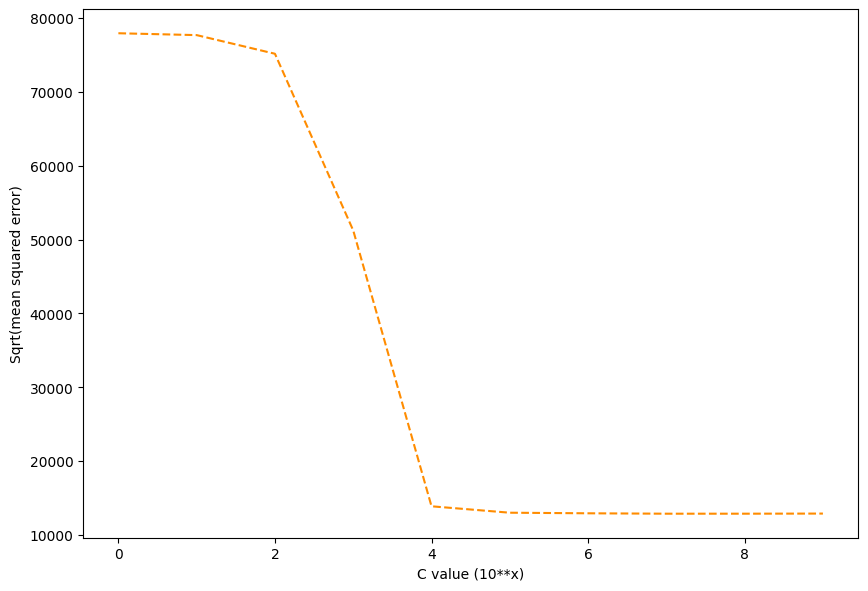

In [78]:
find_best_C_Linear()

In [88]:
svr = make_pipeline(StandardScaler(),LinearSVR(C=10**4,epsilon=1,max_iter=10**7))
svr.fit(X_train.values, y_train.values)
svr.score(X_test.values, y_test.values)

0.8533160095416332

In [89]:
svr.score(X_train.values, y_train.values)

0.8555932395885084

In [90]:
print(f"My parents can sell their car approximately for {int(svr.predict([my_car]))}zł ")

My parents can sell their car approximately for 39672zł 


### Polynomial SVR Regression

In [54]:
from sklearn.svm import SVR

In [59]:
def find_best_C():
    a = 1
    err = []
    for _ in range(8):
        a*=10
        poly_svr = make_pipeline(StandardScaler(),SVR(degree=2, C=a, epsilon=1))
        poly_svr.fit(X_train.values, y_train.values)
        pred_poly_svr = poly_svr.predict(X_test.values) 
        err.append(np.sqrt(mean_squared_error(y_test, pred_poly_svr)))
    plt.figure(figsize=(10,7),dpi=100)
    plt.plot(range(8),
             err,
             linestyle='--',
             color='darkorange')
    plt.xlabel('C value (10**x)')
    plt.ylabel('Sqrt(mean squared error)')

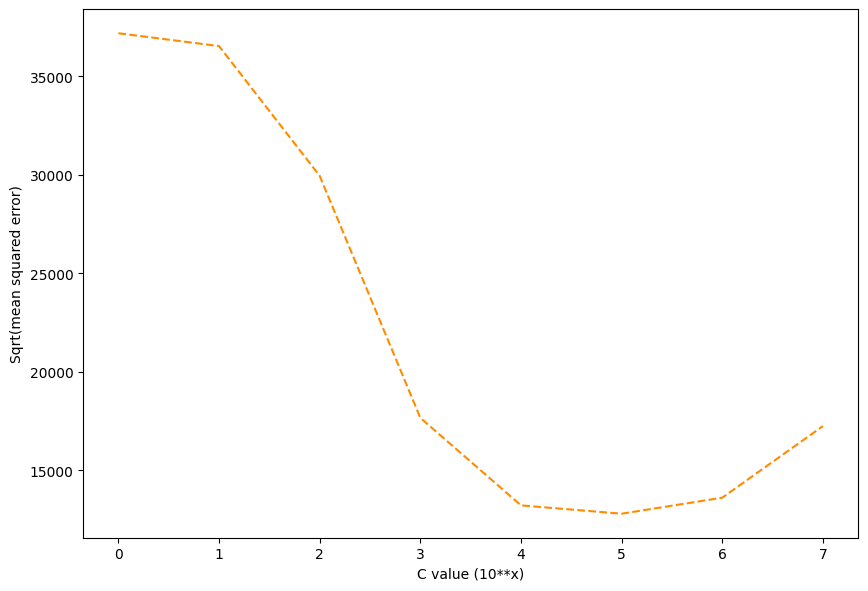

In [60]:
find_best_C()

In [63]:
poly_svr = make_pipeline(StandardScaler(),SVR(degree=2, C=10**5, epsilon=1.5))
poly_svr.fit(X_train.values, y_train.values)
pred_poly_svr = poly_svr.predict(X_test.values)
np.sqrt(mean_squared_error(y_test, pred_poly_svr))

13216.78723196375

In [64]:
poly_svr.score(X_test.values, y_test.values)

0.8487387990201695

In [65]:
poly_svr.predict([my_car])

array([40607.11312637])

In [66]:
poly_svr = make_pipeline(StandardScaler(),SVR(degree=2, C=10**5, epsilon=1.5))
poly_svr.fit(X_train.values, y_train.values)
pred_poly_svr = poly_svr.predict(X_test.values)
np.sqrt(mean_squared_error(y_test, pred_poly_svr))

13216.78723196375

In [67]:
poly_svr.score(X_test.values, y_test.values)

0.8487387990201695

In [68]:
poly_svr.predict([my_car])

array([40607.11312637])

As we can see Polynomial SVR doing better predictions at big C values, it means that it's better to use linear model which give us better prediciotns and will not cause overfitting.